# Train OCR kz text Detector

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrKz-2019-04-26.zip
unzip autoriaNumberplateOcrKz-2019-04-26.zip
mv autoriaNumberplateOcrKz-2019-04-26 kz
```
or use your own dataset.

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "kz"
VERSION = "2020_08_26_tensorflow_v2"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [3]:
class kz(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        
        self.EPOCHS = 7
        

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'H', 'I', 'L', 'A', 'M', 'G', 'W', 'N', '7', 'Q', 'D', 'Y', 'F', 'X', 'T', '9', 'J', '1', 'S', '8', '4', '3', 'C', '2', 'V', 'U', '5', 'E', '6', 'B', '0', 'K', 'Z', 'O', 'R', 'P'}
Letters val  {'H', 'I', 'L', 'A', 'M', 'G', 'W', 'N', '7', 'Q', 'D', 'Y', 'F', 'X', 'T', '9', 'J', '1', 'S', '8', '4', '3', 'C', '2', 'V', 'U', '5', '6', 'E', 'B', '0', 'K', 'Z', 'O', 'R', 'P'}
Letters test  {'H', 'I', 'L', 'M', 'G', 'W', 'N', '7', 'Q', 'D', 'Y', 'F', 'X', 'T', '9', 'J', '1', 'S', '8', '4', '3', 'C', '2', 'V', 'U', '5', 'E', '6', 'B', 'P', '0', 'K', 'Z', 'O', 'R', 'A'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


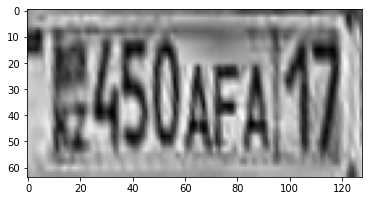

2) the_labels (plate number): 450AFA17 is encoded as [4, 5, 0, 10, 15, 10, 1, 7]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED


In [4]:
ocrTextDetector = kz()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False)

In [ ]:
model = ocrTextDetector.train()


START TRAINING
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_kz (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_kz[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
_______________________________________________________________________

In [6]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 464MUA14
True: 			 464MJA14

Predicted: 		 25AL07
True: 			 205AE07

Predicted: 		 243WA02
True: 			 243MWA02

Predicted: 		 306HZ17
True: 			 306IHZ17

Predicted: 		 020VAZ09
True: 			 020VAZ04

Predicted: 		 979U6A13
True: 			 979UOA13

Predicted: 		 462IA02
True: 			 462IGA02

Predicted: 		 755GFZ05
True: 			 755GPZ05

Predicted: 		 103A03
True: 			 123PDA03

Predicted: 		 820PA8
True: 			 T920PAM

Predicted: 		 707QQO09
True: 			 707QQQ09

Predicted: 		 155EI02
True: 			 155EYB02

Predicted: 		 462IA02
True: 			 462IGA02

Predicted: 		 5LKA02
True: 			 195LKA02

Predicted: 		 555HA02
True: 			 555WHA02

Predicted: 		 181NEB06
True: 			 181NCB05

Predicted: 		 72AJA09
True: 			 772AJA09

Predicted: 		 777EFE04
True: 			 777EEE04

Predicted: 		 091BAA03
True: 			 091BAA07

Predicted: 		 179VEZM
True: 			 179VEZ14

Predicted: 		 13PDA03
True: 			 123PDA03

Predicted: 		 069VI09
True: 			 069VIP09

Predicted: 		 4236602
True: 			 H236602

Predicted: 		 805LOA10

In [7]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_kz_2020_08_26_tensorflow_v2.h5


GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'H', 'I', 'L', 'A', 'M', 'G', 'W', 'N', '7', 'Q', 'D', 'Y', 'F', 'X', 'T', '9', 'J', '1', 'S', '8', '4', '3', 'C', '2', 'V', 'U', '5', 'E', '6', 'B', '0', 'K', 'Z', 'O', 'R', 'P'}
Letters val  {'H', 'I', 'L', 'A', 'M', 'G', 'W', 'N', '7', 'Q', 'D', 'Y', 'F', 'X', 'T', '9', 'J', '1', 'S', '8', '4', '3', 'C', '2', 'V', 'U', '5', '6', 'E', 'B', '0', 'K', 'Z', 'O', 'R', 'P'}
Letters test  {'H', 'I', 'L', 'M', 'G', 'W', 'N', '7', 'Q', 'D', 'Y', 'F', 'X', 'T', '9', 'J', '1', 'S', '8', '4', '3', 'C', '2', 'V', 'U', '5', 'E', '6', 'B', 'P', '0', 'K', 'Z', 'O', 'R', 'A'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


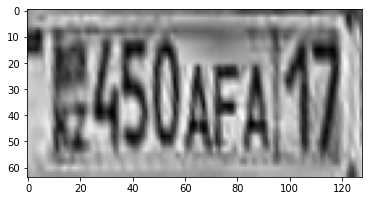

2) the_labels (plate number): 450AFA17 is encoded as [4, 5, 0, 10, 15, 10, 1, 7]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "functional_47"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_kz (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_kz[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
___________________________

In [20]:
# Train with aug
ocrTextDetector = kz()
ocrTextDetector.EPOCHS = 1

model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

model = ocrTextDetector.train(load_last_weights=True)

In [21]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 243WA02
True: 			 243MWA02

Predicted: 		 306HZ17
True: 			 306IHZ17

Predicted: 		 123DA03
True: 			 123PDA03

Predicted: 		 820PAM
True: 			 T920PAM

Predicted: 		 777EFE04
True: 			 777EEE04

Predicted: 		 379VEZ14
True: 			 179VEZ14

Predicted: 		 103OA03
True: 			 123PDA03

Predicted: 		 046BAA00
True: 			 046BAA08

Predicted: 		 851IZ05
True: 			 851IRZ05

Predicted: 		 470KHA09
True: 			 470KHA06

Predicted: 		 46FA02
True: 			 410OFA02

Predicted: 		 386TTO
True: 			 A386TTO

Predicted: 		 392A07
True: 			 392AD07
Test processing time: 0.6287429332733154 seconds
acc: 0.953405017921147


In [22]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_kz_2020_08_26_tensorflow_v2.h5
